## Perfil dos inscritos 
#### Que compareceram a todas as provas, não zerando nenhuma das cinco provas objetivas e a redação.
* Idade alunos varia dentre 10 anos e 80 anos, a idade media ficou em 20 anos¹.
* As notas variam entre 20 até 200 (nota máxima) para as objetivas, e 160 até 980 para a redação¹.
* O estados que mais tiveram participantes SP, MG, BA, RJ e CE e os que tiveram menos participanes RR, AC, AP, TO, RO respectivamente. 
* Tivemos um total de 5095270 inscritos, porem dos incritos apenas 3702008 (72.7%) compareceram a todas as provas.
* Tivemos um total de 1160010 (22.8%) que não foram a nehunha das provas
* Tivemos um total de 233252 (4.6%) que compareceram a algumas das provas




*¹OS dados foram analuisados em cima de uma amostragem de 100000 inscritos*.


In [1]:
#imporrtando Blibliotecas
import pyspark
import pandas as pd
#from pyspark.sql import SparkSaession
from pyspark.sql.types import *
import seaborn as sns
import statistics  as sts
import matplotlib.pyplot as plt


#conifgurações
pd.set_option('display.max_columns', 999)
import warnings 
warnings.filterwarnings("ignore")


## Definindo funções uteis 

In [2]:
def spark_display(df, limit = 10):
    display(df.limit(limit).toPandas())   


## Lendo e criando tabela temporária

In [2]:
data = spark.read.parquet("/user/projeto/parquet")
data.createOrReplaceTempView("table")

### Verificando quantos alunos compareceram a todas a provas 

In [3]:
total_incrito = data.count()
total_presente = spark.sql("select * from  table where TP_PRESENCA_CN = 1 and TP_PRESENCA_CH  = 1 and TP_PRESENCA_LC  = 1 and TP_PRESENCA_MT  = 1").count()
total_ausente = spark.sql("select * from  table where TP_PRESENCA_CN = 0 and TP_PRESENCA_CH  = 0 and TP_PRESENCA_LC  = 0 and TP_PRESENCA_MT  = 0").count()
parcial_ausente = spark.sql("select * from  table where NOT (TP_PRESENCA_CN = 0 and TP_PRESENCA_CH  = 0 and TP_PRESENCA_LC  = 0 and TP_PRESENCA_MT  = 0) and NOT (TP_PRESENCA_CN = 1 and TP_PRESENCA_CH  = 1 and TP_PRESENCA_LC  = 1 and TP_PRESENCA_MT  = 1)").count()
print("Tivemos um total de {} inscritos, porem dos incritos apenas {} ({:.1f}%) compareceram a todas as provas.".format(total_incrito, total_presente, ((total_presente/total_incrito)*100)))
print("Tivemos um total de {} ({:.1f}%) que não foram a nehunha das provas".format(total_ausente, ((total_ausente/total_incrito)*100)))
print("Tivemos um total de {} ({:.1f}%) que compareceram a algumas das provas".format(parcial_ausente, ((parcial_ausente/total_incrito)*100)))

Tivemos um total de 5095270 inscritos, porem dos incritos apenas 3702008 (72.7%) compareceram a todas as provas.
Tivemos um total de 1160010 (22.8%) que não foram a nehunha das provas
Tivemos um total de 233252 (4.6%) que compareceram a algumas das provas


#### Gerando tabela descritiva. com base em amostragem 

In [4]:
%%time
limite_100000 = spark.sql("select * from  table where TP_PRESENCA_CN = 1 and TP_PRESENCA_CH  = 1 and TP_PRESENCA_LC  = 1 and TP_PRESENCA_MT = 1 and NU_NOTA_COMP1 != 0 and NU_NOTA_COMP1 != 0 and NU_NOTA_COMP2 != 0 and NU_NOTA_COMP3 != 0 and NU_NOTA_COMP4 != 0 and NU_NOTA_COMP5 != 0 limit 100000")
pd100000 = limite_100000.toPandas()

CPU times: user 1.52 s, sys: 307 ms, total: 1.83 s
Wall time: 6.44 s


In [99]:
limite_100000_test = spark.sql("select * from  table where TP_PRESENCA_CN = 1 and TP_PRESENCA_CH  = 1 and TP_PRESENCA_LC  = 1 and TP_PRESENCA_MT = 1 and NU_NOTA_COMP1 != 0 and NU_NOTA_COMP1 != 0 and NU_NOTA_COMP2 != 0 and NU_NOTA_COMP3 != 0 and NU_NOTA_COMP4 != 0 and NU_NOTA_COMP5 != 0 limit 10")
pd100000 = limite_100000_test.toPandas()
pd100000

,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,NO_MUNICIPIO_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,NO_MUNICIPIO_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,NO_MUNICIPIO_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,Piripiri,PI,16,F,1,3,1,São Paulo,SP,3,0,1,None,1,None,None,None,None,Piripiri,PI,1,1,1,1,1,1,120,120,140,160,140,680,C,C,B,B,4,B,A,B,C,A,A,B,B,A,A,A,A,A,B,A,A,B,A,B,A
1,Osasco,SP,24,M,1,2,1,Osasco,SP,1,6,1,1,0,None,None,None,None,São Paulo,SP,1,1,1,1,1,1,140,120,120,120,140,640,E,E,B,B,4,E,A,B,C,B,A,B,B,B,A,B,A,A,C,B,A,D,B,A,B
2,Santa Rita,PB,22,F,1,3,1,Santa Rita,PB,2,0,2,None,0,None,None,None,None,Santa Rita,PB,1,1,1,1,1,1,120,120,120,120,60,540,D,C,C,A,5,B,A,C,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A
3,Santo Antônio de Jesus,BA,34,F,1,2,1,Santo Antônio de Jesus,BA,1,13,1,None,0,None,None,None,None,Santo Antônio de Jesus,BA,1,1,1,1,1,1,160,180,160,160,100,760,B,B,C,C,4,E,A,C,D,B,A,B,A,B,A,A,A,A,C,A,A,E,A,A,B
4,Sete Lagoas,MG,62,M,3,3,1,Sete Lagoas,MG,1,13,1,None,0,None,None,None,None,Sete Lagoas,MG,1,1,1,1,0,1,120,120,120,120,120,600,C,B,C,A,3,E,A,B,C,B,A,B,A,B,A,B,A,A,B,A,A,B,B,B,B
5,Primavera do Leste,MT,45,F,2,1,1,Toledo,PR,1,13,1,None,0,None,None,None,None,Primavera do Leste,MT,1,1,1,1,0,1,140,200,140,160,140,780,C,G,A,D,2,H,A,D,D,C,B,B,A,B,A,B,A,B,C,A,B,C,A,B,B
6,Rio de Janeiro,RJ,56,M,2,1,1,Rio de Janeiro,RJ,1,13,1,None,0,None,None,None,None,Rio de Janeiro,RJ,1,1,1,1,1,1,120,180,120,120,100,640,A,B,C,F,5,K,A,C,C,B,A,B,A,B,A,B,A,B,B,B,A,D,A,B,B
7,Santa Maria da Vitória,BA,24,F,1,3,1,Santa Maria da Vitória,BA,1,1,1,1,0,None,None,None,None,Santa Maria da Vitória,BA,1,1,1,1,0,1,120,120,100,80,140,560,D,E,C,B,2,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A
8,Natal,RN,37,M,0,1,1,Natal,RN,1,13,1,None,0,None,None,None,None,Natal,RN,1,1,1,1,0,1,120,100,120,120,120,580,G,F,E,E,2,H,A,C,C,B,A,B,B,B,A,B,A,B,C,A,A,C,A,C,B
9,Pirapora,MG,17,F,1,3,1,Pirapora,MG,3,0,1,None,1,None,None,None,None,Pirapora,MG,1,1,1,1,1,1,160,160,160,180,160,820,C,F,C,B,4,D,A,C,D,B,A,B,B,A,A,A,A,A,B,A,A,C,B,B,B


In [79]:
pd100000.describe().round(1)

,NU_IDADE,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
count,99995.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0
mean,22.9,124.4,127.0,119.6,123.4,102.3,596.8
std,8.5,22.4,29.0,27.4,26.1,42.1,117.1
min,10.0,20.0,40.0,20.0,20.0,20.0,160.0
25%,17.0,120.0,120.0,100.0,120.0,80.0,520.0
50%,20.0,120.0,120.0,120.0,120.0,100.0,580.0
75%,25.0,140.0,120.0,140.0,140.0,120.0,660.0
max,80.0,200.0,200.0,200.0,200.0,200.0,980.0


#### Gerando tabela de incritos por estado

In [5]:

uf_min = spark.sql("select SG_UF_RESIDENCIA, count(SG_UF_RESIDENCIA) as count from  table where TP_PRESENCA_CN = 1 and TP_PRESENCA_CH  = 1 and TP_PRESENCA_LC  = 1 and TP_PRESENCA_MT = 1 and NU_NOTA_COMP1 != 0 and NU_NOTA_COMP1 != 0 and NU_NOTA_COMP2 != 0 and NU_NOTA_COMP3 != 0 and NU_NOTA_COMP4 != 0 and NU_NOTA_COMP5 != 0 group by SG_UF_RESIDENCIA order by count limit 5").toPandas()

In [6]:
uf_max = spark.sql("select SG_UF_RESIDENCIA, count(SG_UF_RESIDENCIA) as count from  table where TP_PRESENCA_CN = 1 and TP_PRESENCA_CH  = 1 and TP_PRESENCA_LC  = 1 and TP_PRESENCA_MT = 1 and NU_NOTA_COMP1 != 0 and NU_NOTA_COMP1 != 0 and NU_NOTA_COMP2 != 0 and NU_NOTA_COMP3 != 0 and NU_NOTA_COMP4 != 0 and NU_NOTA_COMP5 != 0 group by SG_UF_RESIDENCIA order by count DESC limit 5").toPandas()

In [7]:
frames = [uf_min, uf_max]
display(pd.concat(frames))


,SG_UF_RESIDENCIA,count
0,RR,6467
1,AC,21166
2,AP,23092
3,TO,26696
4,RO,31750
0,SP,499001
1,MG,335323
2,BA,237646
3,RJ,211331
4,CE,180885


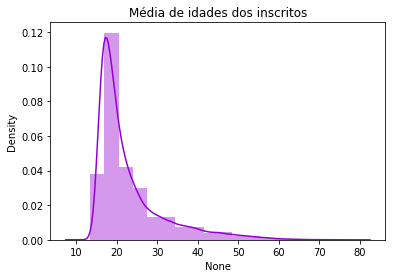

In [11]:
sns.distplot(limite_100000.where("NU_IDADE > 0 ").orderBy('NU_IDADE').select("NU_IDADE").toPandas(), bins=20, rug=False, color='darkviolet').set_title('Média de idades dos inscritos');

In [13]:
limite_100000.where("NU_IDADE > 0 ").orderBy('NU_IDADE').select("NU_IDADE").toPandas()

,NU_IDADE
0,10
1,11
2,12
3,12
4,13
...,...
99990,75
99991,75
99992,78
99993,78


In [71]:
g_nota_classe = spark.sql("select Q006 as CLASSE, AVG(NU_NOTA_REDACAO) as NOTA_REDACAO from  table where TP_PRESENCA_CN = 1 and TP_PRESENCA_CH  = 1 and TP_PRESENCA_LC  = 1 and TP_PRESENCA_MT = 1 and NU_NOTA_COMP1 != 0 and NU_NOTA_COMP1 != 0 and NU_NOTA_COMP2 != 0 and NU_NOTA_COMP3 != 0 and NU_NOTA_COMP4 != 0 and NU_NOTA_COMP5 != 0 group by Q006 order by Q006 limit 10000").toPandas()

In [72]:
v_grafic

,CLASSE,NOTA_REDACAO
0,A,574.689916
1,B,588.054083
2,C,606.163391
3,D,622.699273
4,E,633.196370
5,F,651.116455
6,G,662.248255
7,H,682.024437
8,I,693.256338
9,J,707.183950


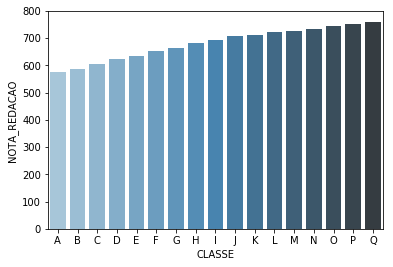

In [78]:
sns.barplot(x="CLASSE", y="NOTA_REDACAO", data=g_nota_classe, palette="Blues_d");

In [84]:
g_nota_idade = spark.sql("select NU_IDADE,  AVG(NU_NOTA_REDACAO) as NOTA_REDACAO from  table where TP_PRESENCA_CN = 1 and TP_PRESENCA_CH  = 1 and TP_PRESENCA_LC  = 1 and TP_PRESENCA_MT = 1 and NU_NOTA_COMP1 != 0 and NU_NOTA_COMP1 != 0 and NU_NOTA_COMP2 != 0 and NU_NOTA_COMP3 != 0 and NU_NOTA_COMP4 != 0 and NU_NOTA_COMP5 != 0 and NU_IDADE > 0 group by NU_IDADE order by NU_IDADE DESC limit 10000").toPandas()

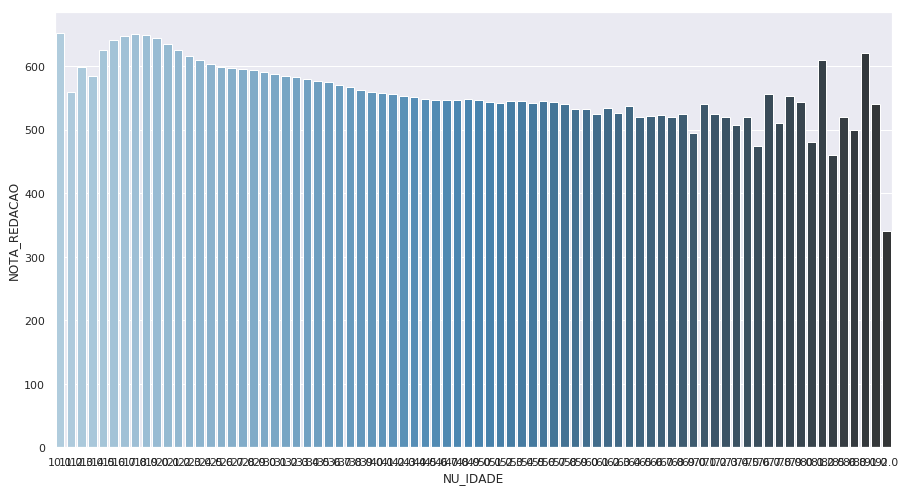

In [103]:
#g_nota_idade
sns.set(rc = {'figure.figsize':(15,8)})
sns.barplot(x="NU_IDADE", y="NOTA_REDACAO", data=g_nota_classe, palette="Blues_d");